In [ ]:
# installation of Weights & Biases
!pip install wandb

In [ ]:
# Import of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.cm as cm
%matplotlib inline

In [ ]:
# wandb login
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Getting the training artifact from wandb

In [ ]:
# starting a run in wandb
run = wandb.init(entity="flamigos", project="Murshroom-Kmeans", job_type="pre_train")

# downloading the training artifact
artifact = run.use_artifact("flamigos/Murshroom-Kmeans/train.csv:v0").file()
df = pd.read_csv(artifact)
run.finish()

df

wandb: Currently logged in as: francisco-valmir (flamigos). Use `wandb login --relogin` to force relogin


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,2,3,0,3,0,0,1,6,...,0,2,0,0,0,0,0,1,4,3
1,0,4,1,4,1,7,0,0,0,8,...,0,0,1,0,0,0,1,4,3,4
2,1,3,0,1,0,2,0,1,0,3,...,0,0,0,0,0,0,0,2,3,3
3,1,3,0,0,1,3,1,0,1,1,...,0,6,7,0,1,0,0,6,3,6
4,0,0,2,3,1,4,0,0,1,2,...,3,3,4,0,0,0,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,0,4,0,4,1,4,0,0,0,8,...,3,0,1,0,0,0,1,4,3,3
6495,1,0,2,0,0,3,0,0,1,4,...,0,2,2,0,0,0,0,1,4,3
6496,1,0,2,3,1,3,0,1,1,3,...,1,0,0,0,0,0,1,0,0,1
6497,1,0,1,0,0,1,0,0,1,3,...,2,0,0,0,0,0,0,1,4,1


# Looking for the number of optimal clusters

## removing the label we want to get from the dataset

In [ ]:
df=df.drop('class',axis=1)
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,0,3,0,0,1,6,1,...,0,2,0,0,0,0,0,1,4,3
1,4,1,4,1,7,0,0,0,8,1,...,0,0,1,0,0,0,1,4,3,4
2,3,0,1,0,2,0,1,0,3,1,...,0,0,0,0,0,0,0,2,3,3
3,3,0,0,1,3,1,0,1,1,0,...,0,6,7,0,1,0,0,6,3,6
4,0,2,3,1,4,0,0,1,2,0,...,3,3,4,0,0,0,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,4,0,4,1,4,0,0,0,8,1,...,3,0,1,0,0,0,1,4,3,3
6495,0,2,0,0,3,0,0,1,4,1,...,0,2,2,0,0,0,0,1,4,3
6496,0,2,3,1,3,0,1,1,3,1,...,1,0,0,0,0,0,1,0,0,1
6497,0,1,0,0,1,0,0,1,3,0,...,2,0,0,0,0,0,0,1,4,1


## dimensionality reduction using the Principal Component Analysis (PCA) method

This step projects the df dataframe data into a new two-dimensional space represented by the variable pca_2d, thus allowing a two-dimensional visualization of the dataframe data

In [ ]:
# Here, a PCA object is being created with the specification that you want to reduce the dimensionality to 2 main components.
pca = PCA(n_components=2).fit(df)
# The transform method is then used to transform the original dataset using the principal components calculated during the fit
pca_2d = pca.transform(df)

## Elbow method

In [ ]:
# here I will store the inertia
# Inertia is the sum of the quadratic distances from each data point in a cluster to the centroid of that cluster
# The lower the inertia, the better
twss=[]

# here I will store the silhouette scores
# The silhouette score is a measure of how well a given data point is classified in relation to its own cluster and in comparison to other clusters.
# Ranges from -1 to 1. A high score indicates that the object is very similar to its own cluster and different from other clusters.
sa=[]

# doing kmeans for klusters from 2 to 9
for i in range(1,10):
    # kmeans with i clusters
    kmeans = KMeans(n_clusters=i, init= 'k-means++', max_iter=100, n_init=10)
    # application of kmeans to the dataset
    kmeans.fit(df)
    Ypreds=kmeans.predict(df)
    # addition of inertia to the twss array
    twss.append(kmeans.inertia_)
    # add the silhouette score to the sa array
    if i>1:
        sa.append(silhouette_score(df, Ypreds))

## graphs

Text(0, 0.5, 'Total within-cluster sum of squares')

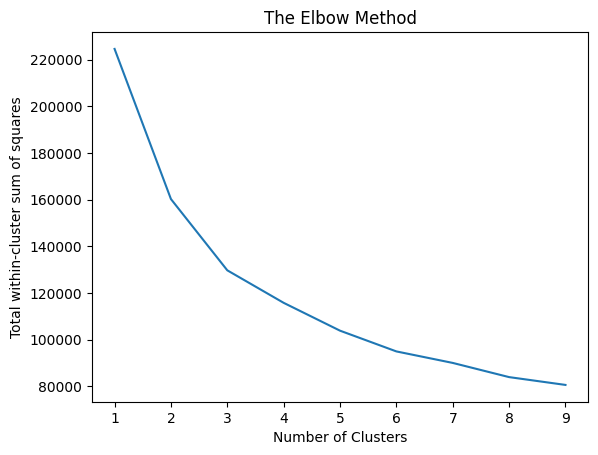

In [ ]:
# graph showing the relationship between number of clusters and inertia
plt.plot(range(1,10),twss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
# Total sum of squares within the cluster // kmeans inertia
plt.ylabel('Total within-cluster sum of squares')

Text(0, 0.5, 'Average silhouette score')

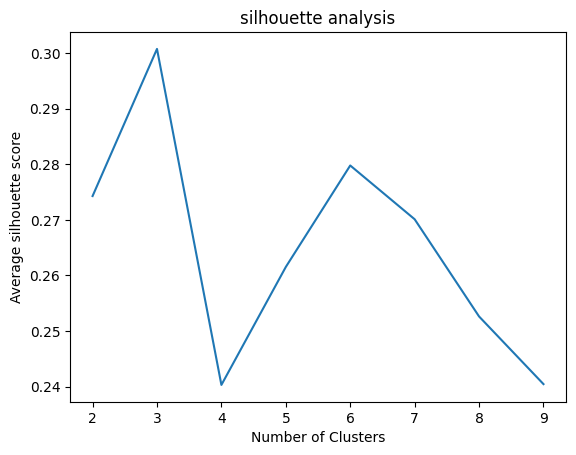

In [ ]:
# graph showing the relationship between the number of clusters and the silhouette score
plt.plot(range(2,10),sa)
plt.title('silhouette analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Average silhouette score')

From the silhouette graph we have the impression that the ideal are 3 clusters, but by knowing the original dataset we know that there are two. It is worth noting that the silhouette score is an estimate and is not error-proof

## Display of graphs for analysis of silhoutte values and cluster grouping

It is important to highlight that the cluster graph is a 2d simplification, the real clusters have more dimensions!!

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


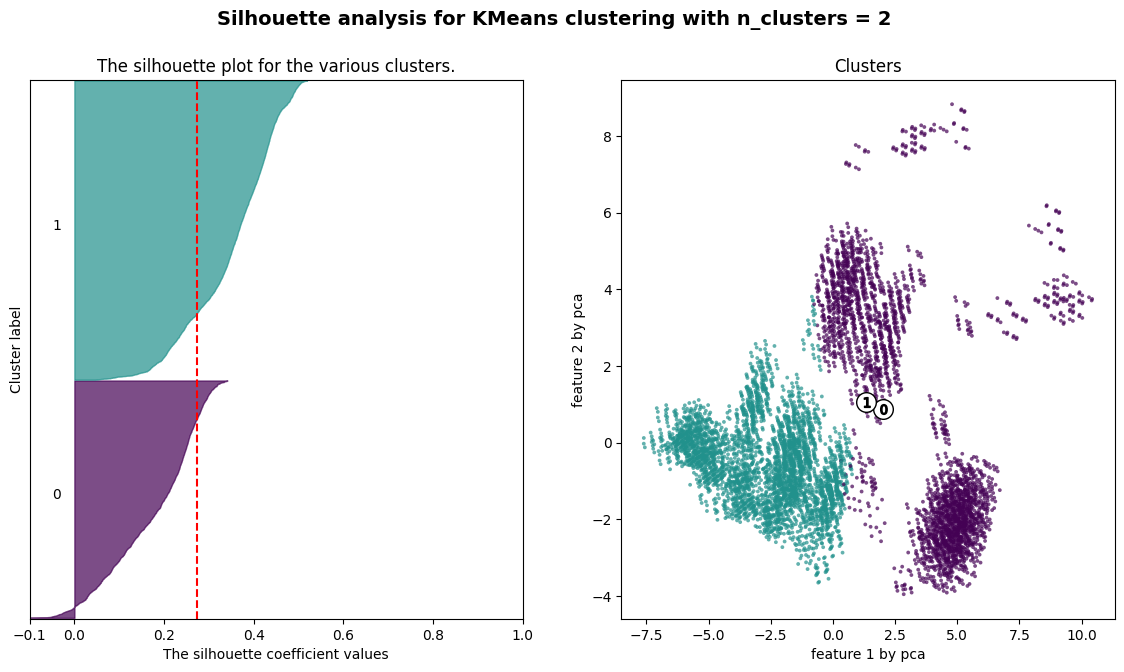

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


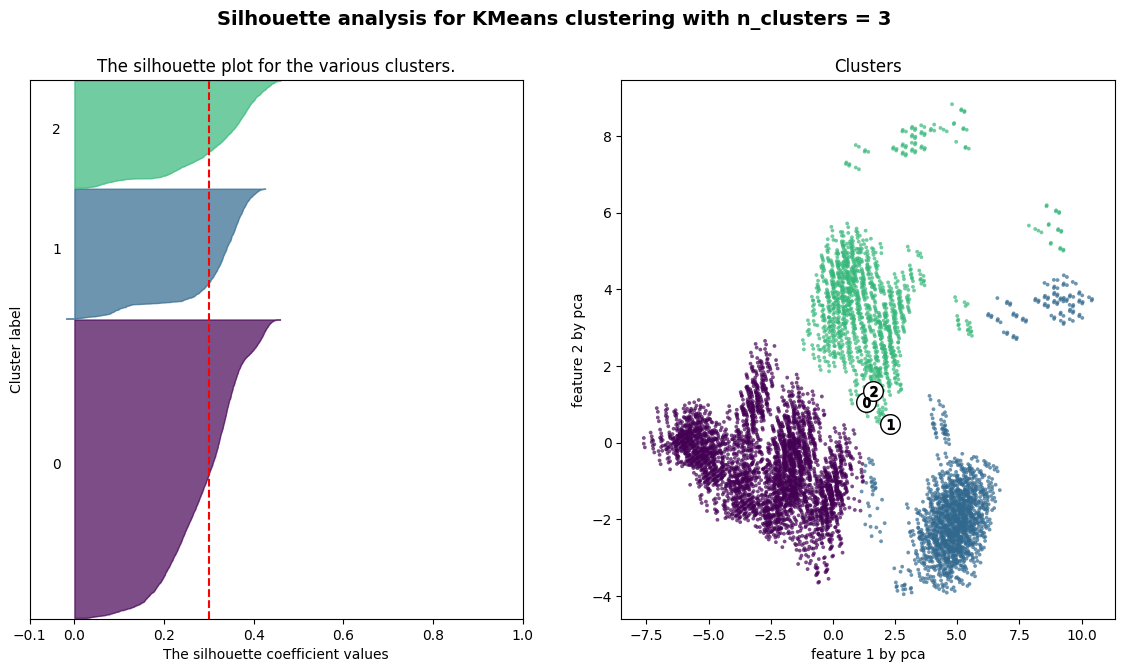

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


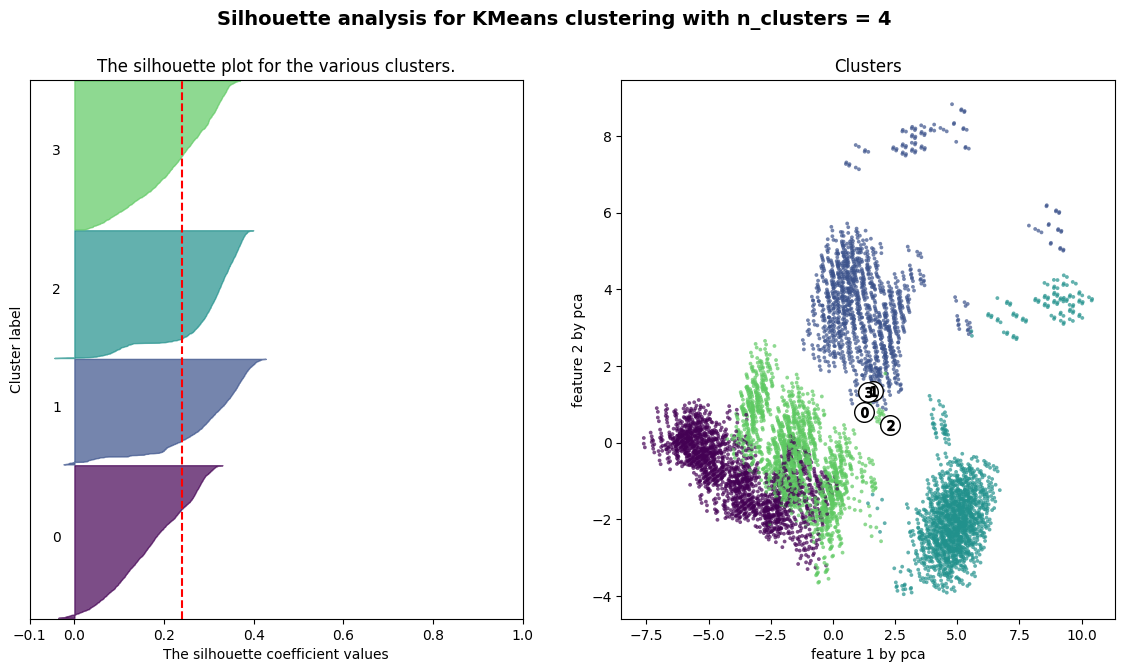

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


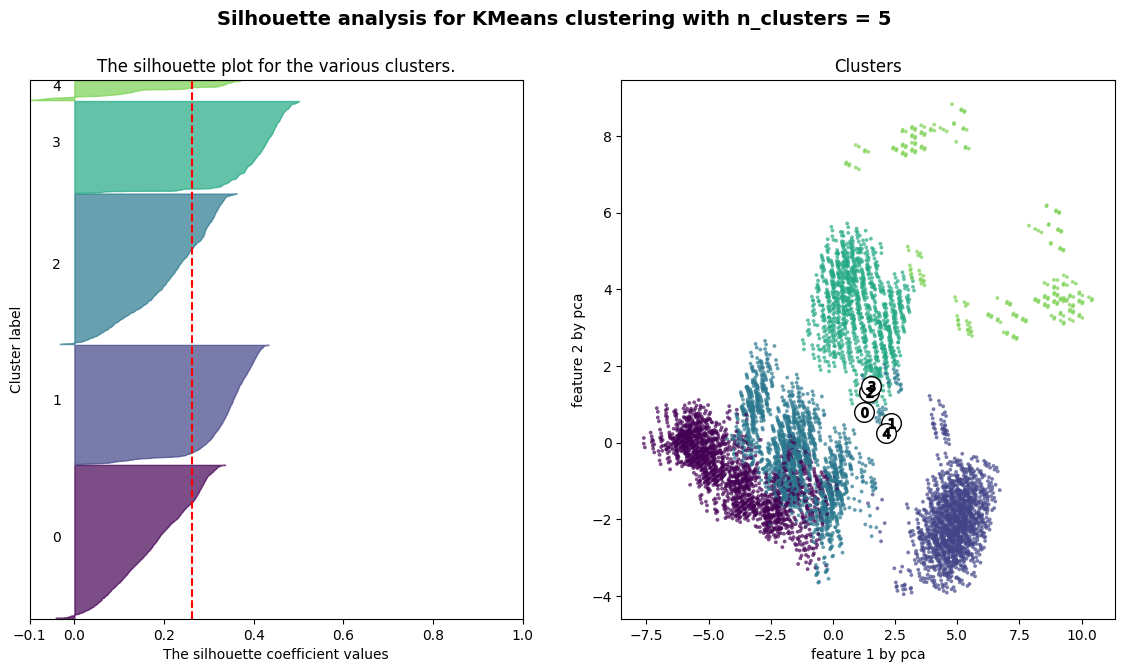

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


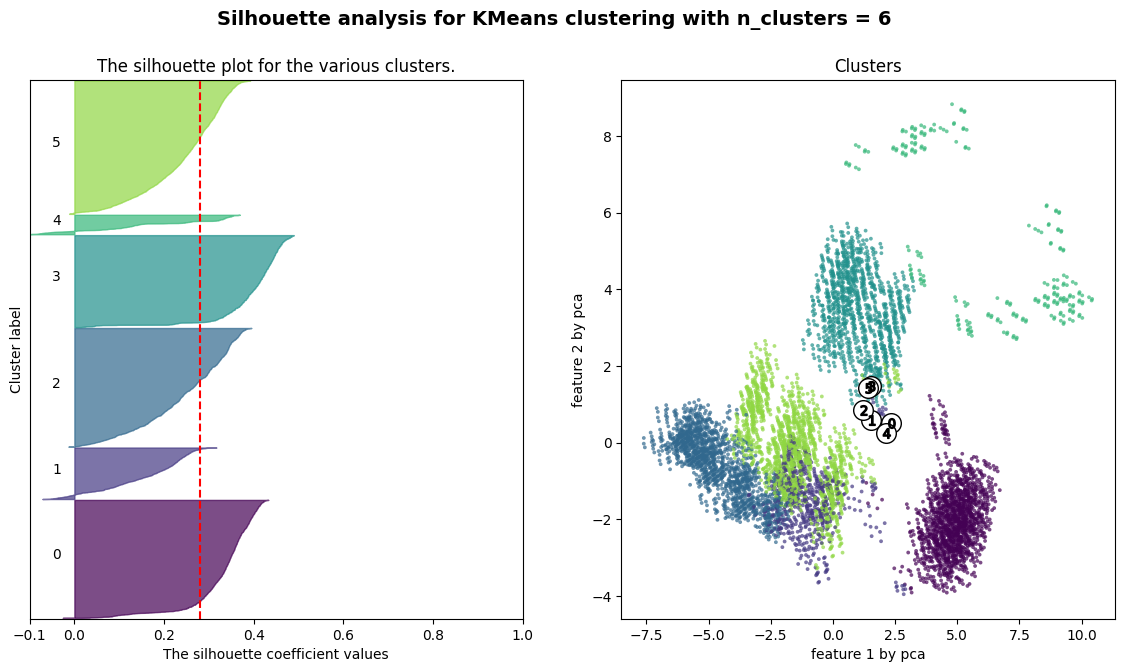

In [ ]:
# creation of kmeans from 2 to 6 and their respective graphs
for n_clusters in range(2,7):
    # graph figure information
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14, 7)

    # x axis with silhouette score values
    ax1.set_xlim([-0.1, 1])
    # y axis with kmeans labels / clusters
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # kmenas with the current n_clusters of the iteration
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    # get the cluster labels
    cluster_labels = clusterer.fit_predict(df)
    # average silhouette score of the model
    silhouette_avg = silhouette_score(df, cluster_labels)
    # array with the silhouette_samples of each data point in the dataset relative to the clusters they were assigned to.
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    # used to ensure that silhouette_samples are one above the other and do not overlap
    y_lower = 10

    # is used to add the y-axis samples
    for i in range(n_clusters):
        # get the values from the current iteration cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        # sort values in ascending order
        ith_cluster_silhouette_values.sort()
        # The variable size_cluster_i is defined as the number of data points in the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        # y_upper is created with y_lower(point on the y axis where the sample starts) + the sample size size_cluster_i
        y_upper = y_lower + size_cluster_i
        # add colors
        color = cm.viridis(float(i) / n_clusters)
        # this line fills the vertical band in the silhouette graph for the cluster between y_lower and y_upper
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # adds a text label next to the cluster's vertical stripe, indicating the cluster number.
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # y_lower becomes yuper + 10 to avoid overlapping values
        y_lower = y_upper + 10

    # values of the visual attributes of the silhouette value graph
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # add colors
    colors = cm.viridis(cluster_labels.astype(float) / n_clusters)
    # generate a scatter plot for the data points in two-dimensional space
    # for this it uses the values in two dimensions that we created in pca_2d
    ax2.scatter(pca_2d[:, 0], pca_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    # centroids
    centers = clusterer.cluster_centers_
    # add centroids to the graph
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # add the centroid labels
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    # values of the visual attributes of the cluster graph
    ax2.set_title("Clusters")
    ax2.set_xlabel("feature 1 by pca")
    ax2.set_ylabel("feature 2 by pca")

    # values of the figure's visual attributes
    plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## conclusion

Following the elbow method and the average silhouette score, the best result to be chosen as the number of cluesters in our kmeans model is 3 cluesters. Following a little behind, we have the numbers of 2 cluesters who have the second highest silhouette score and have a better position in the elbow method than the 6 cluesters who are close in the silhouette score but have a poor value in the elbow method.

In addition, we have the following graphs on the silhouette coefficient and the cluesters that once again show good results for 2 and 3 clusters, but this time the 2 cluesters are better because they have a more uniform distribution when looking at the numbers between the silhouette labels. .

It is important to highlight that each of these methods are heuristics to achieve a value close to the ideal and do not present universal solutions on the subject. In our specific case we have the answer present in the original dataset where we take the data and see that our target label has 2 values (edible and poisonous) and therefore we already have a defined choice for kmeans.

Reference: https://www.kaggle.com/code/yugandhar123/unsupervised-approach-kmeans-clustering